In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Defining $\mathcal{R}_{eff}$

In [2]:
def Reffective(psus,pinf):
    A = (eta*(beta1*b + beta2*(mu + delta)) + lamda*(b*xi + alpha*(mu + delta)))*(mu + delta + gamma + pinf)
    B = pi*eta*(beta1*b + beta2*(mu + delta)) + pi*lamda*(b*xi + alpha*(mu + delta)) - b*(mu + delta + gamma + pinf)*(eta*(mu + psus) + lamda*sigma)
    C = pi*lamda*sigma*b
    
    return B/np.sqrt(B**2 + 4*A*C) + 2

Model

In [3]:
def EbolasystemA(x,t):
    S = x[0]
    I = x[1]
    R = x[2]
    D = x[3]
    P = x[4]
    
    #ODE System
    dSdt = pi -(beta1*I + beta2*D + lamda*P)*S - (mu + psus)*S
    dIdt = (beta1*I + beta2*D + lamda*P)*S - (mu + delta + gamma + pinf)*I
    dRdt = psus*S + (gamma + pinf)*I - mu*R
    dDdt = (mu + delta)*I - b*D
    dPdt = sigma + xi*I + alpha*D - eta*P
    
    return [dSdt, dIdt, dRdt, dDdt, dPdt]

#parameters
pi = 4.05
beta1 = 0.0006
beta2 = 0.0012
lamda = 0.01
mu = 0.02
gamma = 0.03
delta = 0.06
b = 0.5
sigma = 0.6
eta = 0.03
alpha = 0.04
xi = 0.04
psus = 0.0075
pinf = 0.8

#numerically solving ODE system
Y0 = [199, 1, 0, 0, 0]
trange = np.linspace(1,100,5000)
systemA = odeint(EbolasystemA,Y0,trange)

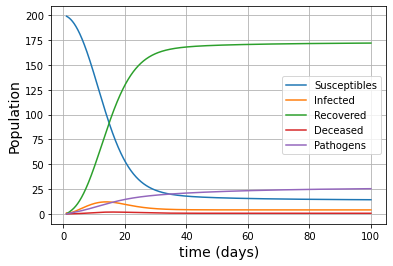

In [4]:
#model simulation
plt.plot(trange,systemA[:,0])
plt.plot(trange,systemA[:,1])
plt.plot(trange,systemA[:,2])
plt.plot(trange,systemA[:,3])
plt.plot(trange,systemA[:,4])
plt.xlabel('time (days)', fontsize = 14)
plt.ylabel('Population', fontsize = 14)
plt.grid(True)
plt.legend(['Susceptibles','Infected','Recovered','Deceased','Pathogens'])

$\mathcal{R}_{eff}$ as a function of vaccination parameters $p_s, \; p_i$

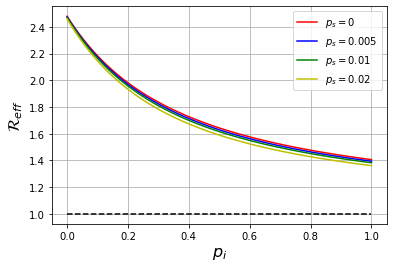

In [5]:
#Plotting R_eff
pinf = np.linspace(0,1,100)
plt.plot(pinf,Reffective(0,pinf), color = 'r', label = '$p_s = 0$')
plt.plot(pinf,Reffective(0.005,pinf), color = 'b', label = '$p_s = 0.005$')
plt.plot(pinf,Reffective(0.01,pinf), color = 'g', label = '$p_s = 0.01$')
plt.plot(pinf,Reffective(0.02,pinf), color = 'y', label = '$p_s = 0.02$')
plt.hlines(1,0,1, color = 'k', linestyle = 'dashed')
plt.xlabel('$p_i$', fontsize = 16)
plt.ylabel('$\mathcal{R}_{eff}$', fontsize = 16)
plt.grid(True)
plt.legend()

In [6]:
print('Reffective = %.3f' % Reffective(0.0075,0.8))

Reffective = 1.458


Model with $p_s = p_i = 0$

In [7]:
def EbolasystemB(x,t):
    S = x[0]
    I = x[1]
    R = x[2]
    D = x[3]
    P = x[4]
    
    #ODE system
    dSdt = pi -(beta1*I + beta2*D + lamda*P)*S - (mu + psus)*S
    dIdt = (beta1*I + beta2*D + lamda*P)*S - (mu + delta + gamma + pinf)*I
    dRdt = psus*S + (gamma + pinf)*I - mu*R
    dDdt = (mu + delta)*I - b*D
    dPdt = sigma + xi*I + alpha*D - eta*P
    
    return [dSdt, dIdt, dRdt, dDdt, dPdt]

#parameters
pi = 4.05
beta1 = 0.0006
beta2 = 0.0012
lamda = 0.01
mu = 0.02
gamma = 0.03
delta = 0.06
b = 0.5
sigma = 0.6
eta = 0.03
alpha = 0.04
xi = 0.04
psus = 0
pinf = 0

#numerically solving ODE system
Y0 = [199, 1, 0, 0, 0]
trange = np.linspace(1,100,5000)
systemB = odeint(EbolasystemB,Y0,trange)

Comparison of models

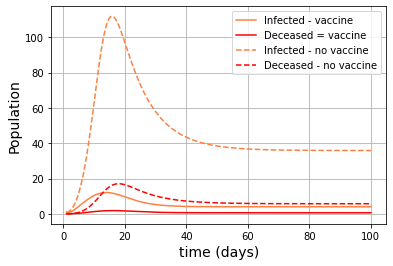

In [8]:
plt.plot(trange,systemA[:,1], color = [1.0, 0.5, 0.25])
plt.plot(trange,systemA[:,3], color = 'r')
plt.plot(trange,systemB[:,1], color = [1.0, 0.5, 0.25], linestyle = 'dashed')
plt.plot(trange,systemB[:,3], color = 'r', linestyle = 'dashed')
plt.xlabel('time (days)', fontsize = 14)
plt.ylabel('Population', fontsize = 14)
plt.grid(True)
plt.legend(['Infected - vaccine', 'Deceased = vaccine', 'Infected - no vaccine', 'Deceased - no vaccine'])